In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("parsed_logs.csv")

In [3]:
df

,start_dt,config,ecc,hostname,sdc,it,ker_time,acc_time,ker_err,acc_err,critical_sdc
0,2022-09-18 14:08:24,cifar10_mobilenetv2_x1_4,OFF,carolinria,1.0,3,1.218517,10.657352,10,10,0.0
1,2022-09-17 08:13:43,c100_res44_test_02_gelu6_nans,OFF,carolinria,0.0,0,0.000000,0.000000,0,0,0.0
2,2022-09-17 09:25:09,c100_res44_test_02_gelu6_nans,OFF,carolinria,0.0,0,0.000000,0.000000,0,0,0.0
3,2022-09-17 08:10:44,c100_res44_test_02_gelu6_nans,OFF,carolinria,0.0,0,0.000000,0.000000,0,0,0.0
4,2022-09-18 09:46:42,cifar10_mobilenetv2_x1_4,OFF,carolinria,0.0,0,0.000000,0.000000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1604,2022-09-18 04:55:55,cifar100_mobilenetv2_x1_4,OFF,carolinria,0.0,0,0.000000,0.000000,0,0,0.0
1605,2022-09-18 10:51:57,cifar10_mobilenetv2_x1_4,OFF,carolinria,0.0,0,0.000000,0.000000,0,0,0.0
1606,2022-09-17 14:13:06,c10_res44_test_01_bn-relu_base,OFF,carolinria,0.0,0,0.000000,0.000000,0,0,0.0
1607,2022-09-16 22:32:18,c100_res44_test_01_bn-relu_base,OFF,carolinria,0.0,0,0.000000,0.000000,0,0,0.0


In [4]:
configs = dict(
    # Baseline C100
    BaseC100="c100_res44_test_01_bn-relu_base.yaml",
    # "c100_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C100
    OrderInvC100="c100_res44_test_02_relu6-bn_200_epochs.yaml",
    # "c100_res44_test_02_bn-relu6_base.yaml",
    # Gelu and nan C100
    GeluNanC100="c100_res44_test_02_gelu6_nans.yaml",

    # Baseline C10
    BaseC10="c10_res44_test_01_bn-relu_base.yaml",
    # "c10_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C10
    OrderInvC10="c10_res44_test_02_relu6-bn_200_epochs.yaml",
    # "c10_res44_test_02_bn-relu6_base.yaml",
    # Gelu and nan C10
    GeluNanC10="c10_res44_test_02_gelu6_nans.yaml",

    MobileNetC100="cifar100_mobilenetv2_x1_4.yaml",
    MobileNetC10="cifar10_mobilenetv2_x1_4.yaml"
)
configs_inv = {v.replace(".yaml", ""): k for k, v in configs.items()}

In [5]:
configs_df = pd.DataFrame([configs]).T.reset_index().rename(columns={0:"YAML", "index": "config"})

In [6]:
configs_df

,config,YAML
0,BaseC100,c100_res44_test_01_bn-relu_base.yaml
1,OrderInvC100,c100_res44_test_02_relu6-bn_200_epochs.yaml
2,GeluNanC100,c100_res44_test_02_gelu6_nans.yaml
3,BaseC10,c10_res44_test_01_bn-relu_base.yaml
4,OrderInvC10,c10_res44_test_02_relu6-bn_200_epochs.yaml
5,GeluNanC10,c10_res44_test_02_gelu6_nans.yaml
6,MobileNetC100,cifar100_mobilenetv2_x1_4.yaml
7,MobileNetC10,cifar10_mobilenetv2_x1_4.yaml


In [7]:
df["config"] = df["config"].apply(lambda x: configs_inv[x])

In [8]:
df["count"] = 1

In [9]:
grouped_df = df.groupby(["config"]).sum()

In [10]:
grouped_df["AVF Tolerable SDC"] = grouped_df["sdc"] / grouped_df["count"]
grouped_df["AVF Critical SDC"] = grouped_df["critical_sdc"] / grouped_df["count"]


In [11]:
grouped_df

,sdc,it,ker_time,acc_time,ker_err,acc_err,critical_sdc,count,AVF Tolerable SDC,AVF Critical SDC
config,,,,,,,,,,
BaseC10,111.0,602,138.607163,1136.131210,1165,1165,58.0,202,0.549505,0.287129
BaseC100,102.0,578,170.179547,1044.060548,9702,9702,43.0,201,0.507463,0.213930
GeluNanC10,100.0,573,153.746335,1114.117400,904,904,9.0,201,0.497512,0.044776
GeluNanC100,114.0,660,159.772910,1217.567973,9958,9958,10.0,201,0.567164,0.049751
MobileNetC10,101.0,533,312.579115,1173.936560,1206,1206,19.0,201,0.502488,0.094527
MobileNetC100,89.0,573,253.206196,1075.768414,10198,10198,17.0,201,0.442786,0.084577
OrderInvC10,83.0,428,136.331162,856.947884,739,739,7.0,201,0.412935,0.034826
OrderInvC100,99.0,565,172.637780,1028.369226,9155,9155,5.0,201,0.492537,0.024876


In [12]:
avf = grouped_df[["AVF Tolerable SDC", "AVF Critical SDC"]].copy()
avf["AVF Tolerable SDC"] -= avf["AVF Critical SDC"]

In [13]:
avf

,AVF Tolerable SDC,AVF Critical SDC
config,,
BaseC10,0.262376,0.287129
BaseC100,0.293532,0.213930
GeluNanC10,0.452736,0.044776
GeluNanC100,0.517413,0.049751
MobileNetC10,0.407960,0.094527
MobileNetC100,0.358209,0.084577
OrderInvC10,0.378109,0.034826
OrderInvC100,0.467662,0.024876


<AxesSubplot:xlabel='config'>

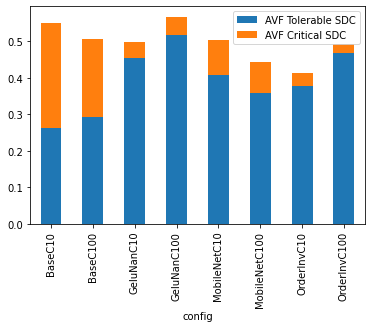

In [14]:
avf.plot.bar(stacked=True)